TokaMax Example: Pulse design example in ITER {#doc_tMax_ITER_ex1}
==========
In this example we show how to use TokaMax for a simple pulse in ITER.
Note: this example requires torax to be installed.

In [1]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import torax

plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['lines.linewidth']=2
plt.rcParams['lines.markeredgewidth']=2
%matplotlib inline
%config InlineBackend.figure_format = "retina"

14:42:25 CRITICAL Could not import 'imas_core': No module named 'imas_core'. Some functionality is not available. @imas_interface.py:34


## Load TokaMaker library

In [2]:
tokamaker_python_path = os.getenv('OFT_ROOTPATH')
if tokamaker_python_path is not None:
    sys.path.append(os.path.join(tokamaker_python_path,'python'))
from OpenFUSIONToolkit.TokaMax import TokaMax

## Load EQDSK files

In [3]:
# Set timesteps
rampup_times = np.linspace(5.0, 80.0, 10)
flattop_times = np.linspace(100.0, 450.0, 10)
rampdown_times = np.linspace(500.0, 600.0, 10)
times = np.r_[rampup_times, flattop_times, rampdown_times]

# Load gEQDSK
g_arr_rampup = [f'ITER-eqdsk/rampup_i={i}.eqdsk' for i in range(10)]
g_arr_flattop = ['ITER-eqdsk/Hmode.eqdsk'] * 10
g_arr_rampdown = g_arr_rampup[::-1]
g_arr = np.r_[g_arr_rampup, g_arr_flattop, g_arr_rampdown]


## Create TokaMax solver object

In [4]:
t_res = np.arange(0.0, 600.0, 10.0)
mysim = TokaMax(0.0, 600.0, times, g_arr, t_res=t_res, last_surface_factor=0.9)
mysim.initialize_gs('ITER_mesh.h5', vsc='VS')

coils = ['CS3U', 'CS2U', 'CS1U', 'CS1L', 'CS2L', 'CS3L', 'PF1', 'PF2', 'PF3', 'PF4', 'PF5', 'PF6']
coil_targets = {coil_name: 0.0 for coil_name in coils}
mysim.set_coil_reg(coil_targets, strict_limit=1.0E8)


#----------------------------------------------
Open FUSION Toolkit Initialized
Development branch:   Add-TokaMax
Revision id:          79a729e
Parallelization Info:
  Not compiled with MPI
  # of OpenMP threads =    2
Fortran input file    = /var/folders/qz/wcp9q1mj0c5fsyjtbt99bvhh0000gn/T/oft_24147/oftpyin
XML input file        = none
Integer Precisions    =    4   8
Float Precisions      =    4   8  16
Complex Precisions    =    4   8
LA backend            = native
#----------------------------------------------


**** Loading OFT surface mesh

**** Generating surface grid level  1
  Generating boundary domain linkage
  Mesh statistics:
    Area         =  2.859E+02
    # of points  =    4757
    # of edges   =   14156
    # of cells   =    9400
    # of boundary points =     112
    # of boundary edges  =     112
    # of boundary cells  =     112
  Resolution statistics:
    hmin =  9.924E-03
    hrms =  2.826E-01
    hmax =  8.466E-01
  Surface grounded at vertex     870


**** C

## Set Actuators and Boundary Conditions

In [5]:
# Set current
ip = {0: 3.0E6, 5: 3.0E6, 80: 15.0E6, 500: 15.0E6, 590: 4.0E6, 600: 4.0E6}

# Set heating
powers = {0: 0, 24: 0, 25: 10.0E6, 79: 10.0E6, 80: 52.0E6, 124: 52.0E6, 125: 40.0E6, 500: 40.0E6, 524: 40.0E6, 525: 35.0E6, 549: 35.0E6, 550: 30.0E6}
nbi_powers = {k: 0.5 * v for k, v in powers.items()}
eccd_powers = {k: 0.5 * v for k, v in powers.items()}

# Set pedestals
T_i_ped = {0: 0.146, 80: 0.146, 85: 3.69, 500: 3.69, 505: 0.146}
T_e_ped = {0: 0.220, 80: 0.220, 85: 3.69, 500: 3.69, 505: 0.220}
n_e_ped = {0: 1.821E19, 79: 1.821E19, 80: 7.482E19}

# Set boundary conditions
ne_right_bc = {0: 0.157E20, 79: 0.157E20, 80: 0.414E20}
Te_right_bc = 0.01
Ti_right_bc = 0.01

mysim.set_Ip(ip)
mysim.set_Zeff(1.8)
mysim.set_heating(nbi=nbi_powers, nbi_loc=0.25, eccd=eccd_powers, eccd_loc=0.35)
mysim.set_right_bc(Te_right_bc=Te_right_bc, Ti_right_bc=Ti_right_bc, ne_right_bc=ne_right_bc)
mysim.set_pedestal(T_i_ped=T_i_ped, T_e_ped=T_e_ped, n_e_ped=n_e_ped)
mysim.set_nbar({0: 0.326E20, 80: .905E20})

## Run Sim

In [6]:
mysim.fly(max_step=5, remove_tmp=True, graph=False)

INFO:2025-11-13 14:42:26,581:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/opt/homebrew/anaconda3/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)
2025-11-13 14:42:26,581 [    INFO] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/opt/homebrew/anaconda3/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)
2025-11-13 14:42:26,611 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbi

Starting non-linear GS solver
     1  2.6145E+00  2.6462E-03  1.1622E-01  6.7125E+00  4.7131E-01  2.7029E-10
     2  2.6717E+00  2.7103E-03  7.0345E-02  6.6991E+00  4.8701E-01  1.3666E-10
     3  2.6868E+00  2.7274E-03  3.2105E-02  6.6946E+00  4.9426E-01  1.5784E-10
     4  2.6911E+00  2.7325E-03  1.2878E-02  6.6931E+00  4.9753E-01  1.7943E-10
     5  2.6924E+00  2.7340E-03  4.9642E-03  6.6925E+00  4.9896E-01  1.5710E-10
     6  2.6928E+00  2.7345E-03  1.8931E-03  6.6923E+00  4.9958E-01  1.5698E-10
     7  2.6929E+00  2.7346E-03  7.2069E-04  6.6923E+00  4.9984E-01  1.5693E-10
     8  2.6929E+00  2.7347E-03  2.7701E-04  6.6922E+00  4.9995E-01  1.5691E-10
     9  2.6929E+00  2.7347E-03  1.0786E-04  6.6922E+00  5.0000E-01  1.5690E-10
    10  2.6929E+00  2.7347E-03  4.2503E-05  6.6922E+00  5.0002E-01  1.5690E-10
    11  2.6929E+00  2.7347E-03  1.6900E-05  6.6922E+00  5.0002E-01  1.5690E-10
    12  2.6929E+00  2.7347E-03  6.7679E-06  6.6922E+00  5.0003E-01  1.5690E-10
    13  2.6929E+00  2.

     9  1.9484E+00  2.1269E-02  1.4264E-04  6.7369E+00  5.0013E-01  1.9104E-02
    10  1.9484E+00  2.1269E-02  5.5125E-05  6.7369E+00  5.0015E-01  1.9105E-02
    11  1.9484E+00  2.1269E-02  2.1530E-05  6.7369E+00  5.0016E-01  1.9105E-02
    12  1.9484E+00  2.1269E-02  8.4922E-06  6.7369E+00  5.0017E-01  1.9105E-02
    13  1.9484E+00  2.1269E-02  3.3787E-06  6.7369E+00  5.0017E-01  1.9105E-02
    14  1.9484E+00  2.1269E-02  1.3540E-06  6.7369E+00  5.0017E-01  1.9105E-02
    15  1.9484E+00  2.1269E-02  5.4578E-07  6.7369E+00  5.0017E-01  1.9105E-02
 Timing:  0.11902200058102608     
   Source:     3.8273002952337265E-002
   Solve:      3.9708994328975677E-002
   Boundary:   3.8159973919391632E-003
   Other:      3.7224005907773972E-002
Equilibrium Statistics:
  Topology                =   Limited
  Toroidal Current [A]    =    4.1222E+06
  Current Centroid [m]    =    6.593  0.500
  Magnetic Axis [m]       =    6.737  0.500
  Elongation              =    1.420 (U:  1.419, L:  1.420)
  Tr

/Users/johnl/Desktop/OpenFUSIONToolkit-SOL-Currents/install_release/python/OpenFUSIONToolkit/TokaMax/_core.py:941: RuntimeWarning: divide by zero encountered in scalar divide
  err = np.abs(cflux - cflux_prev) / cflux_prev
2025-11-13 14:42:58,225 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:42:58,240 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:42:58,2

 Using COCOS=2...


2025-11-13 14:42:58,386 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:42:58,403 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:42:58,420 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Pl

Starting non-linear GS solver
     1  2.6039E+00  2.7681E-03  1.1612E-01  6.7130E+00  4.7131E-01 -1.3910E-02
     2  2.6610E+00  2.8351E-03  7.0378E-02  6.6998E+00  4.8702E-01 -1.2507E-02
     3  2.6760E+00  2.8531E-03  3.2113E-02  6.6953E+00  4.9426E-01 -1.2099E-02
     4  2.6803E+00  2.8584E-03  1.2881E-02  6.6938E+00  4.9753E-01 -1.1974E-02
     5  2.6816E+00  2.8600E-03  4.9683E-03  6.6933E+00  4.9896E-01 -1.1937E-02
     6  2.6819E+00  2.8605E-03  1.8980E-03  6.6931E+00  4.9958E-01 -1.1926E-02
     7  2.6821E+00  2.8606E-03  7.2517E-04  6.6930E+00  4.9984E-01 -1.1923E-02
     8  2.6821E+00  2.8607E-03  2.7964E-04  6.6930E+00  4.9995E-01 -1.1922E-02
     9  2.6821E+00  2.8607E-03  1.0901E-04  6.6930E+00  5.0000E-01 -1.1922E-02
    10  2.6821E+00  2.8607E-03  4.2930E-05  6.6930E+00  5.0002E-01 -1.1922E-02
    11  2.6821E+00  2.8607E-03  1.7058E-05  6.6930E+00  5.0002E-01 -1.1922E-02
    12  2.6821E+00  2.8607E-03  6.8273E-06  6.6930E+00  5.0003E-01 -1.1922E-02
    13  2.6821E+00  2.

Saving gEQDSK: tmp/002.009.eqdsk
 Using COCOS=2...
Starting non-linear GS solver
     1  5.8378E+00  3.7056E-02  3.3213E-01  6.3688E+00  5.1260E-01 -1.1148E-02
     2  6.1905E+00  3.9121E-02  2.1888E-01  6.3649E+00  5.2831E-01  2.1829E-02
     3  6.3063E+00  3.9792E-02  1.1381E-01  6.3640E+00  5.3580E-01  3.7768E-02
     4  6.3489E+00  4.0036E-02  5.3577E-02  6.3638E+00  5.3942E-01  4.4889E-02
     5  6.3656E+00  4.0130E-02  2.4296E-02  6.3638E+00  5.4116E-01  4.8035E-02
     6  6.3724E+00  4.0169E-02  1.0876E-02  6.3638E+00  5.4199E-01  4.9417E-02
     7  6.3752E+00  4.0185E-02  4.8444E-03  6.3638E+00  5.4238E-01  5.0028E-02
     8  6.3764E+00  4.0191E-02  2.1581E-03  6.3638E+00  5.4257E-01  5.0297E-02
     9  6.3769E+00  4.0194E-02  9.6016E-04  6.3638E+00  5.4265E-01  5.0415E-02
    10  6.3771E+00  4.0195E-02  4.2688E-04  6.3638E+00  5.4269E-01  5.0468E-02
    11  6.3772E+00  4.0196E-02  1.8977E-04  6.3638E+00  5.4271E-01  5.0491E-02
    12  6.3773E+00  4.0196E-02  8.4373E-05  6.3638

2025-11-13 14:43:16,742 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:16,758 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:16,773 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Pl

Saving gEQDSK: tmp/002.029.eqdsk
 Using COCOS=2...


2025-11-13 14:43:16,871 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:16,887 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:16,903 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Pl

Starting non-linear GS solver
     1  2.6044E+00  2.7633E-03  1.1613E-01  6.7130E+00  4.7131E-01 -1.4618E-02
     2  2.6614E+00  2.8301E-03  7.0376E-02  6.6998E+00  4.8702E-01 -1.3216E-02
     3  2.6764E+00  2.8480E-03  3.2113E-02  6.6953E+00  4.9426E-01 -1.2808E-02
     4  2.6807E+00  2.8533E-03  1.2880E-02  6.6938E+00  4.9753E-01 -1.2683E-02
     5  2.6820E+00  2.8549E-03  4.9682E-03  6.6932E+00  4.9896E-01 -1.2646E-02
     6  2.6824E+00  2.8554E-03  1.8979E-03  6.6930E+00  4.9958E-01 -1.2635E-02
     7  2.6825E+00  2.8556E-03  7.2502E-04  6.6930E+00  4.9984E-01 -1.2632E-02
     8  2.6825E+00  2.8556E-03  2.7960E-04  6.6930E+00  4.9995E-01 -1.2631E-02
     9  2.6825E+00  2.8556E-03  1.0900E-04  6.6930E+00  5.0000E-01 -1.2631E-02
    10  2.6825E+00  2.8556E-03  4.2928E-05  6.6930E+00  5.0002E-01 -1.2631E-02
    11  2.6825E+00  2.8556E-03  1.7058E-05  6.6929E+00  5.0002E-01 -1.2631E-02
    12  2.6825E+00  2.8556E-03  6.8247E-06  6.6929E+00  5.0003E-01 -1.2631E-02
    13  2.6825E+00  2.

Saving gEQDSK: tmp/003.009.eqdsk
 Using COCOS=2...
Starting non-linear GS solver
     1  5.8445E+00  3.6966E-02  3.3217E-01  6.3686E+00  5.1261E-01 -1.1230E-02
     2  6.1974E+00  3.9026E-02  2.1890E-01  6.3647E+00  5.2832E-01  2.1750E-02
     3  6.3133E+00  3.9695E-02  1.1380E-01  6.3638E+00  5.3582E-01  3.7691E-02
     4  6.3559E+00  3.9938E-02  5.3574E-02  6.3636E+00  5.3944E-01  4.4813E-02
     5  6.3727E+00  4.0033E-02  2.4294E-02  6.3636E+00  5.4118E-01  4.7960E-02
     6  6.3794E+00  4.0071E-02  1.0876E-02  6.3636E+00  5.4201E-01  4.9342E-02
     7  6.3823E+00  4.0087E-02  4.8441E-03  6.3636E+00  5.4240E-01  4.9953E-02
     8  6.3835E+00  4.0093E-02  2.1577E-03  6.3636E+00  5.4259E-01  5.0222E-02
     9  6.3840E+00  4.0096E-02  9.5998E-04  6.3636E+00  5.4267E-01  5.0340E-02
    10  6.3842E+00  4.0097E-02  4.2686E-04  6.3636E+00  5.4271E-01  5.0393E-02
    11  6.3843E+00  4.0098E-02  1.8977E-04  6.3636E+00  5.4273E-01  5.0416E-02
    12  6.3843E+00  4.0098E-02  8.4385E-05  6.3636

2025-11-13 14:43:35,188 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:35,203 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:35,219 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Pl

Saving gEQDSK: tmp/003.029.eqdsk
 Using COCOS=2...


2025-11-13 14:43:35,319 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:35,336 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:35,352 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Pl

Starting non-linear GS solver
     1  2.6044E+00  2.7632E-03  1.1613E-01  6.7130E+00  4.7131E-01 -1.4624E-02
     2  2.6614E+00  2.8301E-03  7.0376E-02  6.6998E+00  4.8702E-01 -1.3222E-02
     3  2.6764E+00  2.8480E-03  3.2113E-02  6.6953E+00  4.9426E-01 -1.2814E-02
     4  2.6807E+00  2.8533E-03  1.2880E-02  6.6938E+00  4.9753E-01 -1.2689E-02
     5  2.6820E+00  2.8549E-03  4.9682E-03  6.6932E+00  4.9896E-01 -1.2652E-02
     6  2.6824E+00  2.8554E-03  1.8979E-03  6.6930E+00  4.9958E-01 -1.2641E-02
     7  2.6825E+00  2.8555E-03  7.2502E-04  6.6930E+00  4.9984E-01 -1.2638E-02
     8  2.6825E+00  2.8556E-03  2.7960E-04  6.6930E+00  4.9995E-01 -1.2637E-02
     9  2.6825E+00  2.8556E-03  1.0900E-04  6.6930E+00  5.0000E-01 -1.2637E-02
    10  2.6825E+00  2.8556E-03  4.2928E-05  6.6929E+00  5.0002E-01 -1.2637E-02
    11  2.6825E+00  2.8556E-03  1.7058E-05  6.6929E+00  5.0002E-01 -1.2637E-02
    12  2.6825E+00  2.8556E-03  6.8242E-06  6.6929E+00  5.0003E-01 -1.2637E-02
    13  2.6825E+00  2.

    13  8.9413E+00  8.1024E-03  1.1237E-06  6.3665E+00  5.0086E-01  1.9295E-02
    14  8.9413E+00  8.1024E-03  4.7187E-07  6.3665E+00  5.0086E-01  1.9295E-02
 Timing:  0.10898000001907349     
   Source:     3.5358998924493790E-002
   Solve:      3.4997995942831039E-002
   Boundary:   4.1099935770034790E-003
   Other:      3.4513011574745178E-002
Equilibrium Statistics:
  Topology                =   Limited
  Toroidal Current [A]    =    1.5000E+07
  Current Centroid [m]    =    6.156  0.500
  Magnetic Axis [m]       =    6.366  0.501
  Elongation              =    1.527 (U:  1.528, L:  1.527)
  Triangularity           =   -0.019 (U: -0.025, L: -0.014)
  Plasma Volume [m^3]     =   774.333
  q_0, q_95               =    1.226  2.069
  Plasma Pressure [Pa]    =   Axis:  9.3778E+04, Peak:  9.3778E+04
  Stored Energy [J]       =    3.8786E+07
  <Beta_pol> [%]          =    6.2634
  <Beta_tor> [%]          =    0.3029
  <Beta_n>   [%]          =    0.2160
  Diamagnetic flux [Wb]   =    2.1

2025-11-13 14:43:53,562 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:53,579 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Please verify carefully.
               Future work will be done to correctly handle EQDSK inputs provided with a specific COCOS value.
2025-11-13 14:43:53,594 [ WARNING] 
               The TORAX EQDSK converter has only been tested against CHEASE-generated EQDSK which is COCOS=2.
               The converter is not guaranteed to work as expected with arbitrary EQDSK input. Pl

Starting non-linear GS solver
     1  2.6044E+00  2.7632E-03  1.1613E-01  6.7130E+00  4.7131E-01 -1.4626E-02
     2  2.6614E+00  2.8301E-03  7.0376E-02  6.6998E+00  4.8702E-01 -1.3224E-02
     3  2.6764E+00  2.8480E-03  3.2113E-02  6.6953E+00  4.9426E-01 -1.2816E-02
     4  2.6807E+00  2.8533E-03  1.2880E-02  6.6938E+00  4.9753E-01 -1.2691E-02
     5  2.6820E+00  2.8549E-03  4.9682E-03  6.6932E+00  4.9896E-01 -1.2654E-02
     6  2.6824E+00  2.8554E-03  1.8979E-03  6.6930E+00  4.9958E-01 -1.2643E-02
     7  2.6825E+00  2.8555E-03  7.2502E-04  6.6930E+00  4.9984E-01 -1.2640E-02
     8  2.6825E+00  2.8556E-03  2.7960E-04  6.6930E+00  4.9995E-01 -1.2639E-02
     9  2.6825E+00  2.8556E-03  1.0900E-04  6.6930E+00  5.0000E-01 -1.2639E-02
    10  2.6825E+00  2.8556E-03  4.2928E-05  6.6929E+00  5.0002E-01 -1.2639E-02
    11  2.6825E+00  2.8556E-03  1.7058E-05  6.6929E+00  5.0002E-01 -1.2639E-02
    12  2.6825E+00  2.8556E-03  6.8241E-06  6.6929E+00  5.0003E-01 -1.2639E-02
    13  2.6825E+00  2.

    13  8.9413E+00  8.1024E-03  1.1237E-06  6.3665E+00  5.0086E-01  1.9296E-02
    14  8.9413E+00  8.1024E-03  4.7187E-07  6.3665E+00  5.0086E-01  1.9295E-02
 Timing:  0.10851399973034859     
   Source:     3.5114996135234833E-002
   Solve:      3.5272002220153809E-002
   Boundary:   3.9549991488456726E-003
   Other:      3.4172002226114273E-002
Equilibrium Statistics:
  Topology                =   Limited
  Toroidal Current [A]    =    1.5000E+07
  Current Centroid [m]    =    6.156  0.500
  Magnetic Axis [m]       =    6.366  0.501
  Elongation              =    1.527 (U:  1.528, L:  1.527)
  Triangularity           =   -0.020 (U: -0.025, L: -0.015)
  Plasma Volume [m^3]     =   774.333
  q_0, q_95               =    1.226  2.069
  Plasma Pressure [Pa]    =   Axis:  9.3778E+04, Peak:  9.3778E+04
  Stored Energy [J]       =    3.8786E+07
  <Beta_pol> [%]          =    6.2637
  <Beta_tor> [%]          =    0.3029
  <Beta_n>   [%]          =    0.2160
  Diamagnetic flux [Wb]   =    2.1

## Graph the results

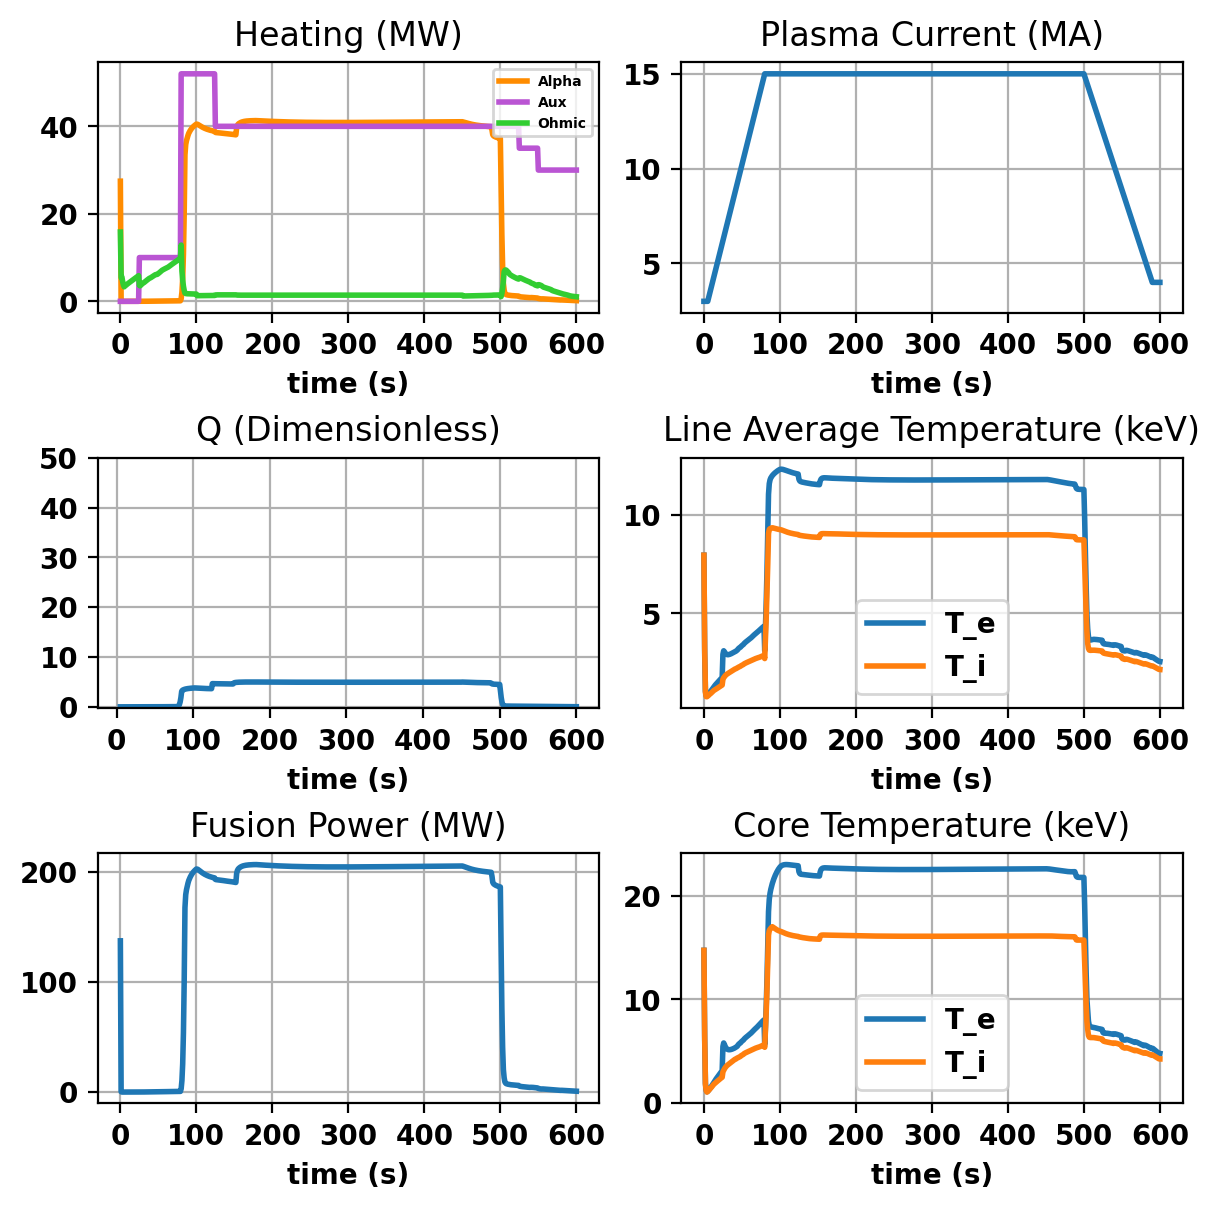

In [ ]:
fname = 'res.json'

res = None
with open(fname, 'r') as f:
    res = json.loads(f.read())

fig, ax = plt.subplots(3, 2) #, figsize=(20,10))

ax[0,0].set_title('Heating (MW)')
ax[0,0].plot(res['P_alpha_total']['x'], np.array(res['P_alpha_total']['y']) / 1.0E6, label='Alpha', c='darkorange')
ax[0,0].plot(res['P_aux_total']['x'], np.array(res['P_aux_total']['y']) / 1.0E6, label='Aux', c='mediumorchid')
ax[0,0].plot(res['P_ohmic_e']['x'], np.array(res['P_ohmic_e']['y']) / 1.0E6, label='Ohmic', c='limegreen')
# ax[0,0].plot(res['P_radiation_e']['x'], np.array(res['P_radiation_e']['y']) / 1.0E6, label='P_radiation_e', c='')
ax[0,0].grid(True)
ax[0,0].legend(fontsize=5, loc='upper right')

ax[1,0].set_title('Q (Dimensionless)')
ax[1,0].plot(res['Q']['x'][5:], res['Q']['y'][5:], label='Q')
ax[1,0].set_yticks([0, 10, 20, 30, 40, 50])
ax[1,0].grid(True)

ax[2,0].set_title('Fusion Power (MW)')
ax[2,0].plot(res['P_alpha_total']['x'], 5.0 * np.array(res['P_alpha_total']['y']) / 1.0E6)
ax[2,0].grid(True)

ax[0,1].set_title('Plasma Current (MA)')
ax[0,1].plot(res['Ip']['x'], np.array(res['Ip']['y']) / 1.0E6)
ax[0,1].grid(True)

ax[2,1].set_title('Core Temperature (keV)')
ax[2,1].plot(res['T_e_core']['x'], res['T_e_core']['y'], label='T_e')
ax[2,1].plot(res['T_i_core']['x'], res['T_i_core']['y'], label='T_i')
ax[2,1].grid(True)
ax[2,1].legend()

ax[1,1].set_title('Line Average Temperature (keV)')
ax[1,1].plot(res['T_e_line_avg']['x'], res['T_e_line_avg']['y'], label='T_e')
ax[1,1].plot(res['T_i_line_avg']['x'], res['T_i_line_avg']['y'], label='T_i')
ax[1,1].grid(True)
ax[1,1].legend()

ax[0,0].set_xticks(np.linspace(0, 600, 7))
ax[0,1].set_xticks(np.linspace(0, 600, 7))
ax[1,0].set_xticks(np.linspace(0, 600, 7))
ax[1,1].set_xticks(np.linspace(0, 600, 7))
ax[2,0].set_xticks(np.linspace(0, 600, 7))
ax[2,1].set_xticks(np.linspace(0, 600, 7))

ax[0,0].set_xlabel('time (s)')
ax[1,0].set_xlabel('time (s)')
ax[2,0].set_xlabel('time (s)')
ax[0,1].set_xlabel('time (s)')
ax[1,1].set_xlabel('time (s)')
ax[2,1].set_xlabel('time (s)')

plt.tight_layout(pad=0.5)

plt.show()

## More results

dict_keys(['0.0', '10.0', '20.0', '30.0', '40.0', '50.0', '60.0', '70.0', '80.0', '90.0', '100.0', '110.0', '120.0', '130.0', '140.0', '150.0', '160.0', '170.0', '180.0', '190.0', '200.0', '210.0', '220.0', '230.0', '240.0', '250.0', '260.0', '270.0', '280.0', '290.0', '300.0', '310.0', '320.0', '330.0', '340.0', '350.0', '360.0', '370.0', '380.0', '390.0', '400.0', '410.0', '420.0', '430.0', '440.0', '450.0', '460.0', '470.0', '480.0', '490.0', '500.0', '510.0', '520.0', '530.0', '540.0', '550.0', '560.0', '570.0', '580.0', '590.0'])


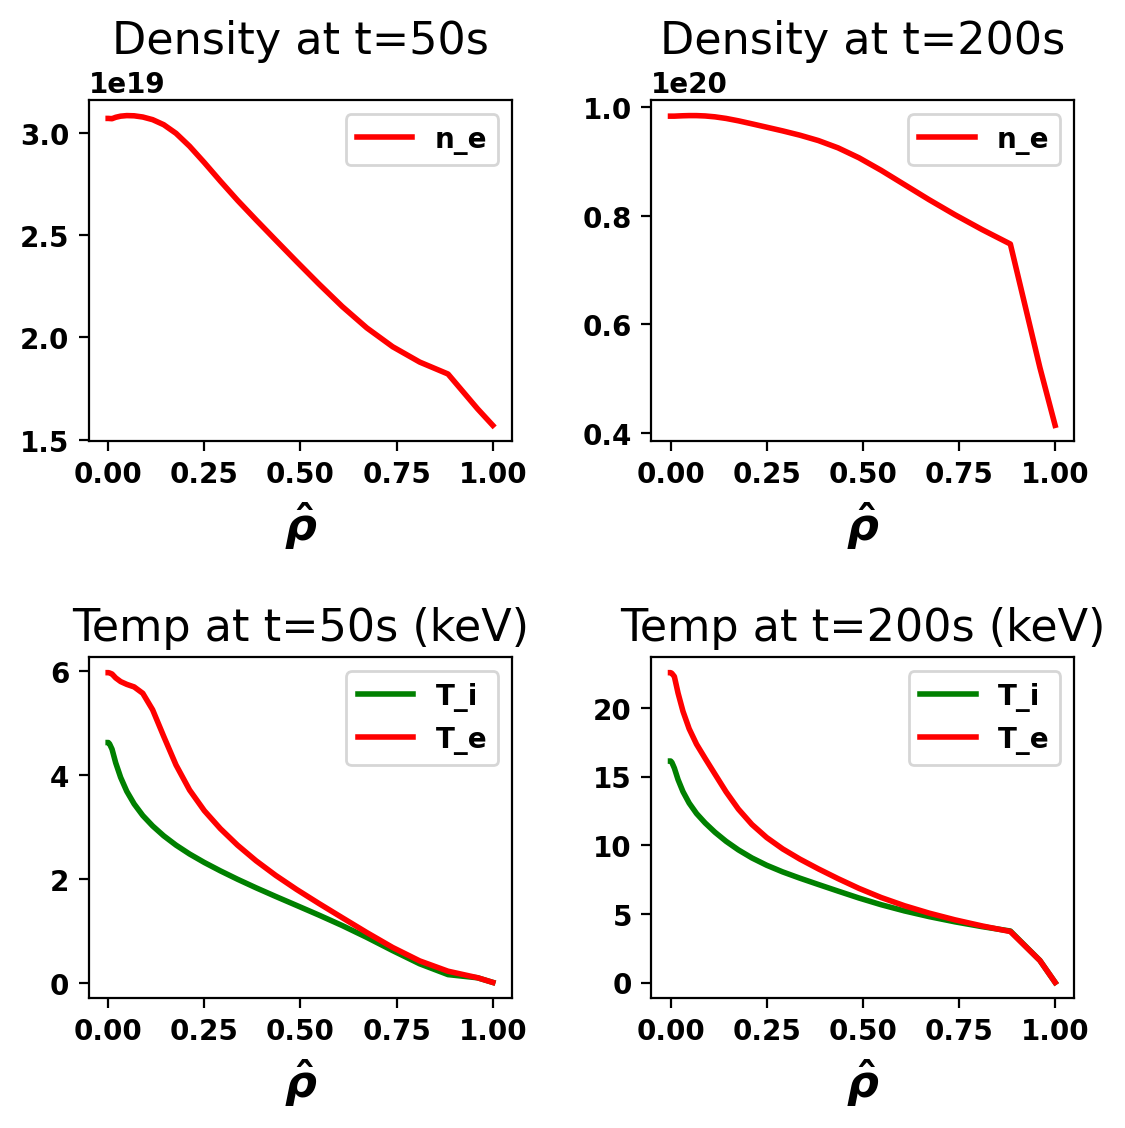

In [ ]:
fig, ax = plt.subplots(2, 2)

ax[0,0].set_title('Density at t=50s', fontsize=16)
# ax[0,0].plot(res['n_i_80s']['x'], res['n_i_80s']['y'], label='n_i')
ax[0,0].plot(res['n_e']['50.0']['x'], res['n_e']['50.0']['y'], label='n_e', c='r')
ax[0,0].set_xlabel(r'$\hat{\rho}$', fontsize=16)
ax[0,0].legend()

ax[0,1].set_title('Density at t=200s', fontsize=16)
# ax[0,1].plot(res['n_i_300s']['x'], res['n_i_300s']['y'], label='n_i')
ax[0,1].plot(res['n_e']['200.0']['x'], res['n_e']['200.0']['y'], label='n_e', c='r')
ax[0,1].set_xlabel(r'$\hat{\rho}$', fontsize=16)
ax[0,1].legend()

ax[1,0].set_title('Temp at t=50s (keV)', fontsize=16)
ax[1,0].plot(res['T_i']['50.0']['x'], res['T_i']['50.0']['y'], label='T_i', c='g')
ax[1,0].plot(res['T_e']['50.0']['x'], res['T_e']['50.0']['y'], label='T_e', c='r')
ax[1,0].set_xlabel(r'$\hat{\rho}$', fontsize=16)
ax[1,0].legend()

ax[1,1].set_title('Temp at t=200s (keV)', fontsize=16)
ax[1,1].plot(res['T_i']['200.0']['x'], res['T_i']['200.0']['y'], label='T_i', c='g')
ax[1,1].plot(res['T_e']['200.0']['x'], res['T_e']['200.0']['y'], label='T_e', c='r')
ax[1,1].set_xlabel(r'$\hat{\rho}$', fontsize=16)
ax[1,1].legend()

fig.tight_layout(pad=2.0)
plt.show()